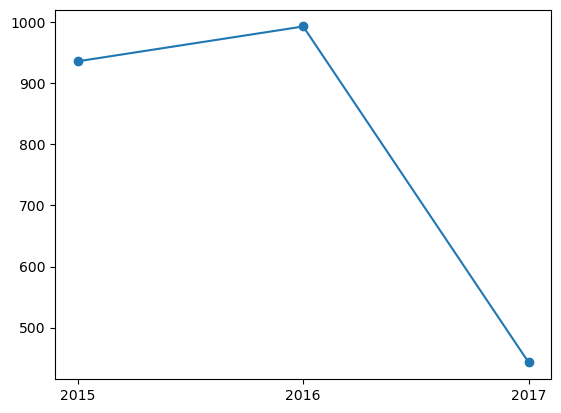

2015 936
2016 993
2017 443


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df_start['Date'].replace("12/05.2015","12/05/2015",inplace = True)
df_start['Date'].replace("13/04.2015","13/04/2015",inplace = True)
df_start['Date'].replace("15/01.2015","15/01/2015",inplace = True)
df_start['Date'].replace("22/01//2015","22/01/2015",inplace = True)

def convert(date):
    return date.split('/')[-1]
df_start['Year'] = df_start['Date'].apply(convert)
yc = df_start['Year'].value_counts()
yf = list(zip(yc.index,yc.values))
yf = np.array(yf,dtype = int)
yf = yf[yf[:,0].argsort()]
y= yf[:,0]
fr = yf[:,1]
plt.plot(y,fr,marker = 'o')
plt.xticks(y)
plt.show()
for i in range(len(y)):
    print(y[i],fr[i])

In [2]:
import pandas as pd

df = pd.read_csv("startup_funding.csv")
df1 = pd.DataFrame({"name":df.StartupName})
df1.dropna(inplace = True)
df1.loc[df1.name.str.startswith("Paytm"), "name"] = "Paytm"
df1=df1.replace('Oyo Rooms','Oyo')
df1=df1.replace('OyoRooms','Oyo')
df1=df1.replace('Oyorooms','Oyo')
df1=df1.replace('OYO Rooms','Oyo')
df1.loc[df1.name.str.startswith("Ola"), "name"] = "Ola"
df1.loc[df1.name.str.startswith("Flipkart"), "name"] = "Flipkart"

top5 = df1["name"].value_counts().sort_values(ascending = False)[:5]
ind = top5.index
rounds = top5.values

for i in range(5):
    print(ind[i]," ",rounds[i])


Ola   9
Swiggy   7
UrbanClap   6
Paytm   6
Oyo   6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)
df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD']='0'
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi'
city=[]
amount=[]
for i in df.CityLocation:
    city.append(i)
for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
    city[i]=city[i].split('/')[0].strip()
np_amount=np.array(amount, dtype='int')
np_city=np.array(city)



dic=dict()
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]]+=np_amount[i]
    else:
        dic[np_city[i]]=np_amount[i]
x=list(dic.keys())
y=list(dic.values())

np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-10:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-10:-1]


#plt.show()

for i in range(len(np_x)):
    print(np_x[i], format((np_y[i]*100)/sum(np_y), '.2f'))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['InvestmentType'].dropna(inplace=True)#empty value ko drop karne keliye,agar value khali hai toh drop kar ne keliye 
def separateCity(city):
    return city.split('/')[0].strip()
df_start['InvestmentType']=df_start['InvestmentType'].apply(separateCity)
df_start['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df_start['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df_start['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
plt.pie(perAmount,labels = city , autopct = "%.2f%%")
plt.axis("equal")
plt.show()
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset=['IndustryVertical'],inplace=True)
df_start['IndustryVertical'].replace("eCommerce","Ecommerce",inplace=True)
df_start['IndustryVertical'].replace("ECommerce","Ecommerce",inplace=True)
df_start['IndustryVertical'].replace("ecommerce","Ecommerce",inplace=True)
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
industry_amount=df_start.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5] # sort the value in discending order
industry=industry_amount.index
amount=industry_amount.values
perAmount=np.true_divide(amount, amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(perAmount[i],'.2f'))

In [ ]:
import pandas as pd
import numpy as np 
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8') 
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",",""))) 
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
start_fund=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5] 
startup=start_fund.index
for i in startup: 
    print(i)

In [ ]:
import pandas as pd

df = pd.read_csv("startup_funding.csv")
df1 = pd.DataFrame({"name":df.StartupName})
df1.dropna(inplace = True)
df1.loc[df1.name.str.startswith("Paytm"), "name"] = "Paytm"
df1=df1.replace('Oyo Rooms','Oyo')
df1=df1.replace('OyoRooms','Oyo')
df1=df1.replace('Oyorooms','Oyo')
df1=df1.replace('OYO Rooms','Oyo')
df1.loc[df1.name.str.startswith("Ola"), "name"] = "Ola"
df1.loc[df1.name.str.startswith("Flipkart"), "name"] = "Flipkart"

top5 = df1["name"].value_counts().sort_values(ascending = False)[:5]
ind = top5.index
rounds = top5.values

for i in range(5):
    print(ind[i]," ",rounds[i])


In [ ]:
import numpy as np
import csv
with open("startup_funding.csv") as f:
    fd=csv.DictReader(f)
    city=[]
    for row in fd:
        a=row["InvestorsName"]
        if (","in a):
            z=a.split(",")
            
            if ("&" in z[-1]):
                for i in range(len(z)-1):
                    city.append(z[i].strip())
                p=z[-1].split("&")
                
                city.append(p[0].strip())
            else:
                for i in range(len(z)):
                    city.append(z[i].strip())
        city.append(a)
city=np.array(city)  

ci,count=np.unique(city,return_counts=True)

x=np.argmax(count)
print(ci[x],count[x])
